# Clustering - a quick walkthrough

The term _clustering_ stands for grouping objects according to their properties without providing any annotation. Algorithms in this field are also reffered to as unsupervised machine learning. The algorithms do receive input from the programmer though, e.g. by selecting specific measurements, which might render the term _unsupervised_ in this context a bit misleading.

When clustering data retrieved from images, we use terms such as standard-scaling, dimensionality reduction and finally algorithms such as k-means clustering. This notebook is a quick walk through using these techniques before the methods are demonstrated in more detail in the following notebooks.

See also
* [Explorative image data science with napari (FocalPlane blog post)](https://focalplane.biologists.com/2022/05/23/explorative-image-data-science-with-napari/)

In [1]:
import pyclesperanto_prototype as cle
from napari_simpleitk_image_processing import label_statistics
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import seaborn
import numpy as np
import umap
import matplotlib.pyplot as plt
from skimage.data import human_mitosis

First we start by loading a 3D dataset showing a Tribolium castaneum embryo undergoing gastrulation (curtesy: Daniela Vorkel, Myers lab, MPI-CBG / CSBD Dresden). The dataset shows dense nuclei marked with nuclei-GFP on the left forming the embryo and less dense nuclei, called serosa, on the right surrounding the embryo.

cl.OCLArray([[[ 2.,  1.,  1., ...,  2.,  2.,  3.],
        [ 1.,  2.,  2., ...,  2.,  2.,  2.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        ...,
        [ 8.,  8.,  7., ..., 10., 10., 10.],
        [ 6.,  7.,  7., ...,  9., 10., 10.],
        [ 7.,  8.,  8., ...,  9.,  9.,  9.]],

       [[ 2.,  1.,  1., ...,  1.,  1.,  2.],
        [ 1.,  2.,  2., ...,  1.,  2.,  2.],
        [ 1.,  2.,  2., ...,  1.,  2.,  2.],
        ...,
        [ 8.,  7.,  7., ..., 10., 10.,  9.],
        [ 7.,  8.,  7., ...,  9., 10., 10.],
        [ 7.,  8.,  9., ...,  9.,  9., 10.]],

       [[ 2.,  1.,  0., ...,  1.,  1.,  2.],
        [ 2.,  2.,  1., ...,  1.,  2.,  2.],
        [ 1.,  2.,  2., ...,  1.,  2.,  1.],
        ...,
        [ 8.,  7.,  7., ..., 10., 10.,  9.],
        [ 8.,  8.,  8., ...,  8.,  9., 10.],
        [ 7.,  8.,  9., ...,  9.,  9., 10.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 3.,  2.,  3., ...,  3.,  4.,  3.],
        [ 2.,  2.,  3., ...,  3.,  3.,  3.],
        [ 2.,  2.,  3., ...,  3.,  3.,  3.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 3.,  2.,  2., ...,  4.,  3.,  2.],
        [ 2.,  3.,  3., ...,  3.,  3.,  2.],
        [ 2.,  3.,  3., ...,  3.,  3.,  2.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 3.,  2.,  2., ...,  3.,  3.,  2.],
        [ 2.,  3.,  3., ...,  2.,  3.,  2.],
        [ 2.,  2.,  3., ...,  3.,  3.,  2.]]], dtype=float32)
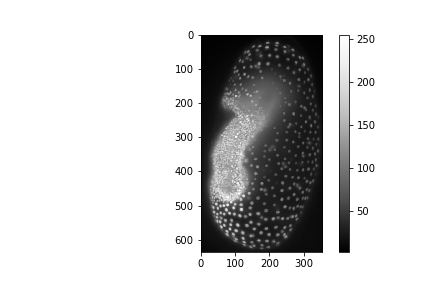
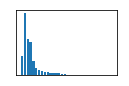

In [2]:
image = cle.imread("../../data/Lund-25MB.tif")
image

We segment the nuclei as shown in earlier sections using [top-hat-filtering for background removal](image-filtering:background_removal) and [Voronoi-Otsu-Labeling](image-segmentation:voronoi-otsu-labeling).

cl.OCLArray([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)
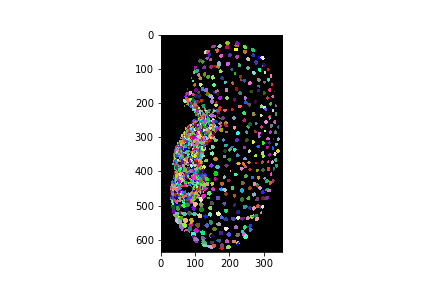

In [3]:
background_subtracted = cle.top_hat_box(image, radius_x=5, radius_y=5)
nuclei_labels = cle.voronoi_otsu_labeling(background_subtracted, spot_sigma=1)
nuclei_labels

## Feature extraction
We next measure properties such as intensity, size and shape from the labeled nuclei using [napari-SimpleITK-image-processing](https://www.napari-hub.org/plugins/napari-simpleitk-image-processing).

In [4]:
statistics = label_statistics(image, nuclei_labels,
                             intensity=True,
                             perimeter=True,
                             shape=True)
statistics.keys()

Index(['label', 'maximum', 'mean', 'median', 'minimum', 'sigma', 'sum',
       'variance', 'elongation', 'feret_diameter', 'flatness', 'roundness',
       'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1',
       'equivalent_ellipsoid_diameter_2', 'equivalent_spherical_perimeter',
       'equivalent_spherical_radius', 'number_of_pixels',
       'number_of_pixels_on_border', 'perimeter', 'perimeter_on_border',
       'perimeter_on_border_ratio'],
      dtype='object')

In [5]:
statistics.head()

,label,maximum,mean,median,minimum,sigma,sum,variance,elongation,feret_diameter,...,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_ellipsoid_diameter_2,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border,perimeter,perimeter_on_border,perimeter_on_border_ratio
0,1,143.0,117.489451,117.041016,93.0,9.489786,27845.0,90.056032,1.228690,8.774964,...,6.517200,7.518360,9.237736,185.203713,3.839016,237,13,191.790349,13.0,0.067782
1,2,113.0,83.052219,82.177734,65.0,9.699808,31809.0,94.086271,1.325096,13.152946,...,7.202178,8.754764,11.600904,255.044898,4.505089,383,74,311.446414,74.0,0.237601
2,3,130.0,108.930403,108.076172,92.0,7.557057,29738.0,57.109109,1.565911,12.884099,...,5.449251,7.816819,12.240444,203.513187,4.024309,273,74,252.130963,74.0,0.293498
3,4,129.0,94.576991,93.134766,70.0,11.433116,53436.0,130.716136,1.227027,14.352700,...,7.665557,10.710899,13.142567,330.508847,5.128456,565,65,396.766310,65.0,0.163824
4,5,149.0,119.454545,119.033203,89.0,12.017958,32850.0,144.431321,1.429829,10.723805,...,6.109627,7.753855,11.086684,204.505937,4.034113,275,0,234.611278,0.0,0.000000


## Feature selection
Selecting the right features for differentiating objects in an art. We will select some features here manually and will explain in the next sections how a good educated guess for selecting features can be made.

In [6]:
selected_statistics = statistics[
    [
        'mean',
        'variance',
        'number_of_pixels',
        'elongation',
        'feret_diameter',
    ]
].values

## Standard scaling
The selected features need to be scaled so that all values range from -1 to 1. This is necessary for the following algorithms as they could misinterpret a perimeter of 5 microns less than a perimeter of 50 pixels, even if both might be exactly the same length physically ([Read more](machine_learning_basics.scaling)).

In [7]:
scaled_statistics = StandardScaler().fit_transform(selected_statistics)

type(scaled_statistics), scaled_statistics.shape

(numpy.ndarray, (1200, 5))

## Dimensionality reduction
As the measured statistics are a large table with many columns, we cannot easily get a picture of the distribution of the data points. For a clustering algorithm it might also be challenging. Thus, we reduce the number of dimensions, e.g. using the [Uniform Manifold Approximation Projection (UMAP)](https://arxiv.org/abs/1802.03426).

In [8]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(scaled_statistics)
type(embedding), embedding.shape

(numpy.ndarray, (1200, 2))

Text(0, 0.5, 'UMAP2')

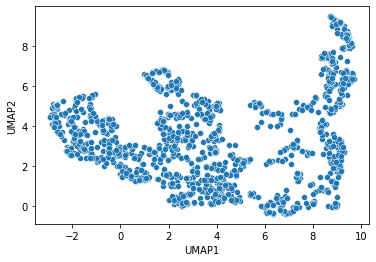

In [9]:
seaborn.scatterplot(x=embedding[:, 0], 
                    y=embedding[:, 1])

plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

## K-means clustering
Eventually, we will automatically annotate all data points with a class. In the following we will separate data points into two classes. Looking at the UMAP visualized above, we need an algorithm that takes relationsships of datapoints locally into account. [K-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) has the capability to group data points in a way so that the distance between the data points to the cluster centers is minimal. It basically splits the data points along a region in the plot where the density of the data points is lower than in cluster centers, e.g. in the plot above where UMAP1 is approximately 5. 

In [10]:
num_classes = 2

kmeans = KMeans(n_clusters=num_classes, random_state=42).fit(embedding)

kmeans_prediction = kmeans.predict(embedding)

C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


<AxesSubplot:>

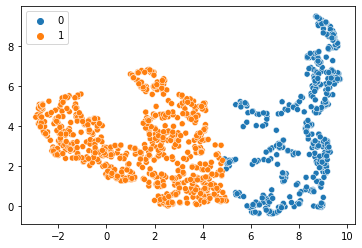

In [11]:
seaborn.scatterplot(x=embedding[:, 0], 
                    y=embedding[:, 1],
                    hue=kmeans_prediction)

We can also project the cluster identifier (0 or 1) back into the 3D image space. We just need to make sure we cannot mix up these two classes with background.

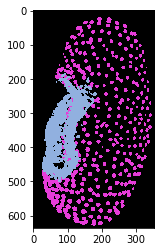

In [12]:
# suffix [0] represents background
# we add 1 to the measurement so that there is no 
# cluster with ID 0, which corresponds to background.
cluster_id = [0] + (kmeans_prediction + 1).tolist()

kmeans_prediction_map = cle.replace_intensities(nuclei_labels, cluster_id)

cle.imshow(kmeans_prediction_map, labels=True)

## Interpreting clustering results
For technical reasons it is illegal to claim that k-means clustering can differentiate serosa and embryo. The algorithm was not informed about what to differentiate and thus, just differentiates objects according to their properties. It is now the task of the scientists to figure out which parameters influenced the decision making. For example, if shape-based parameters dominated the decision making, a follow-up questions would be why so. It might be possible that nuclei within the embryo are differently shaped than nuclei within the serosa. But it is also possible that the nuclei segmentation algorithm caused objects to be segmented wrongly. Thus, clustering is just a tool for generating new hypotheses which need to be investigated further, before an algorithm can be designed that differentiates nuclei in serosa and embryo. Such an algorithm then also needs to be validated, e.g. by processing new, unseen datasets, and measuring the quality of the clustering quantitatively, e.g. by providing ground-truth annotations and comparing with them.